In [2]:
import json
from pprint import pprint

file_path = "evaluation_results/musr_noop_plus-cot_api-20241130_144032.json"
with open(file_path, "r") as file:
    json_data = json.load(file)

labels = []
accuracies = []
errors = []

results = json_data.get("results", {})
key: str
value: {}
for key, value in list(results.items())[1:]:
    acc = value.get("acc_norm,none")
    acc_std = value.get("acc_norm_stderr,none")
    if acc is not None and acc_std is not None:
        if len(key.split("_")) == 4:  #hacky
            label = "_".join(key.split("_")[1:])
            labels.append(label)
            accuracies.append(acc)
            errors.append(acc_std)
model = json_data["pipeline_args"]["pretrained"]
random_choice = 0.5
baseline = 0.532  # 0.528 from 3rd party source
pprint(labels)
print(model)

['murder_mysteries_addition',
 'murder_mysteries_lexicon',
 'murder_mysteries_naive',
 'murder_mysteries_standard',
 'murder_mysteries_syntax',
 'object_placements_addition',
 'object_placements_lexicon',
 'object_placements_naive',
 'object_placements_standard',
 'object_placements_syntax',
 'team_allocation_addition',
 'team_allocation_lexicon',
 'team_allocation_naive',
 'team_allocation_standard',
 'team_allocation_syntax']
meta-llama/Llama-3.1-8B-Instruct


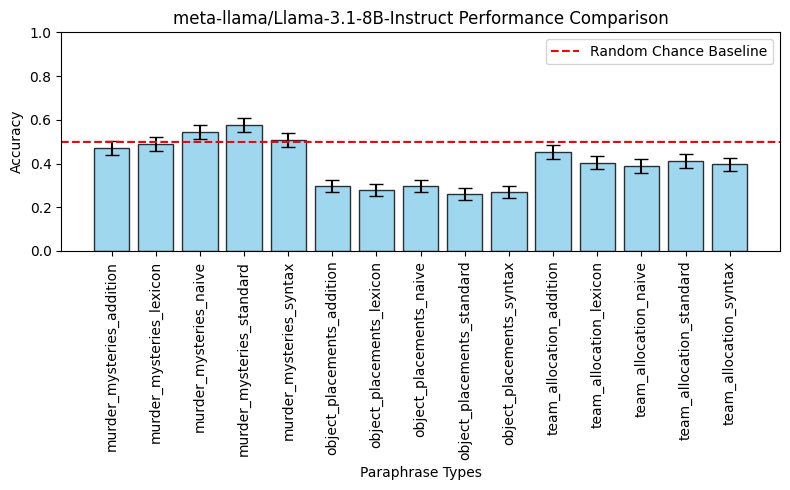

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Plotting
x = np.arange(len(labels))
width = 0.4  # width of the bars

fig, ax = plt.subplots(figsize=(8, 5))

# Bar chart for performance levels
plt.bar(labels, accuracies, yerr=errors, capsize=5, color='skyblue', alpha=0.8, edgecolor='black')

# Baseline lines
ax.axhline(random_choice, color='red', linestyle='--', label='Random Chance Baseline')
#ax.axhline(baseline, color='green', linestyle='--', label=f'{model} MuSR Baseline')

# Adding labels and title
ax.set_xlabel('Paraphrase Types')
ax.set_ylabel('Accuracy')
ax.set_title(f'{model} Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=90)
ax.set_ylim(0.0, 1.0)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [25]:



def plot_results(index):
    baseline = accuracies[index * 5 + 3]
    baseline_error = +errors[index * 5 + 3]
    order = [2, 0, 1, 4]
    l = labels[index * 5:index * 5 + 6]
    l[:] = [l[i] for i in order]
    a = accuracies[index * 5:index * 5 + 6]
    a[:] = [a[i] for i in order]
    e = errors[index * 5:index * 5 + 6]
    e[:] = [e[i] for i in order]
    # Plotting
    x = np.arange(len(l))
    width = 0.4  # width of the bars

    fig, ax = plt.subplots(figsize=(8, 5))

    # Bar chart for performance levels
    plt.bar(l, a, yerr=e, capsize=5, color='skyblue', alpha=0.8, edgecolor='black')

    # Baseline lines
    #ax.axhline(random_choice, color='red', linestyle='--', label='Random Chance Baseline')
    ax.axhline(baseline, color='green', linestyle='--', label=f'{model} MuSR Baseline')
    ax.axhline(baseline + baseline_error, color='green', linestyle='dotted')
    ax.axhline(baseline - baseline_error, color='green', linestyle='dotted')

    # Adding labels and title
    ax.set_xlabel(" ".join(l[0].split("_")[:-1]))
    ax.set_ylabel('Accuracy')
    ax.set_title(f'{model} Performance Comparison')
    ax.set_xticks(x)
    ax.set_ylim(0.0, 1.0)

    ax.set_xticklabels(list(map(lambda x: x.split("_")[-1], l)), )
    ax.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colormaps


def plot_results(index):
    # Extract data for the plot
    baseline = accuracies[index * 5 + 3]
    baseline_error = errors[index * 5 + 3]
    order = [2, 0, 1, 4]
    l = labels[index * 5:index * 5 + 6]
    l[:] = [l[i] for i in order]
    a = accuracies[index * 5:index * 5 + 6]
    a[:] = [a[i] for i in order]
    e = errors[index * 5:index * 5 + 6]
    e[:] = [e[i] for i in order]

    # Plot settings
    x = np.arange(len(l))
    width = 0.4  # Width of the bars

    # Create the plot
    fig, ax = plt.subplots(figsize=(10, 6))

    # Define a color palette using colormaps
    color_map = colormaps["viridis"]
    colors = [color_map(i / (len(l) - 1)) for i in range(len(l))]

    # Bar chart for performance levels
    ax.bar(l, a, yerr=e, capsize=5, color=colors, alpha=0.9, edgecolor='black')

    # Baseline lines
    ax.axhline(baseline, color=color_map(len(l)), linestyle='--', linewidth=1.5, label=f'{model} MuSR Baseline')
    ax.axhline(baseline + baseline_error, color=color_map(len(l)), linestyle='dotted', linewidth=1.2)
    ax.axhline(baseline - baseline_error, color=color_map(len(l)), linestyle='dotted', linewidth=1.2)

    # Adding labels and title
    ax.set_xlabel(" ".join(l[0].split("_")[:-1]), fontsize=14)
    ax.set_ylabel('Accuracy', fontsize=14)
    ax.set_title(f'"{model}" performance on MuSR NoOp+', fontsize=16, fontweight="bold")
    ax.set_ylim(0.0, 1.0)

    # Customize x-ticks
    ax.set_xticks(x)
    ax.set_xticklabels([item.split("_")[-1] for item in l], fontsize=12)

    # Add gridlines for clarity
    ax.grid(axis='y', linestyle='--', alpha=0.6)

    # Customize legend
    ax.legend(fontsize=10, title="Metrics", title_fontsize=12)

    # Tight layout for better spacing
    plt.tight_layout()

    # Show the plot
    plt.show()


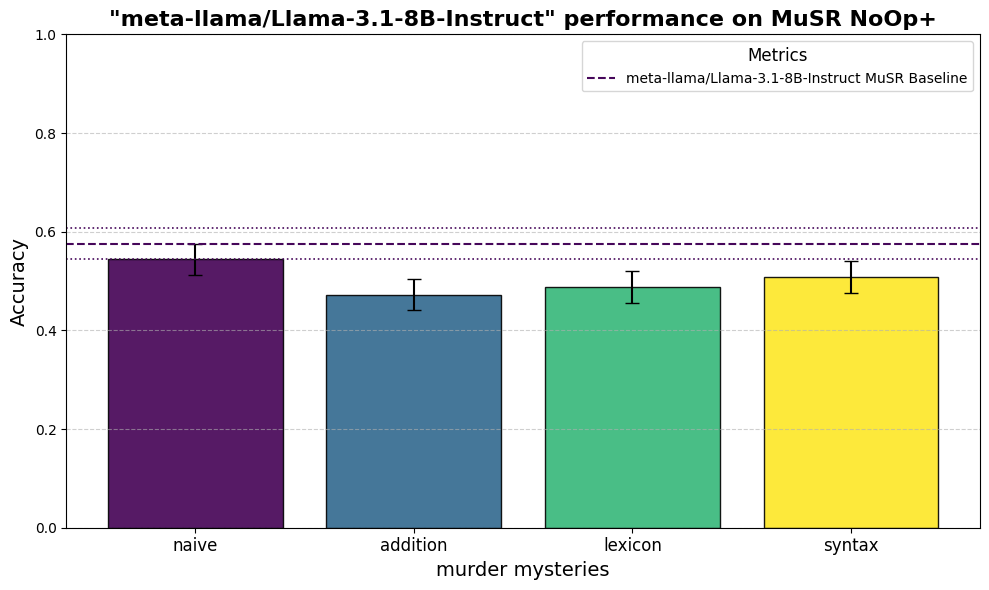

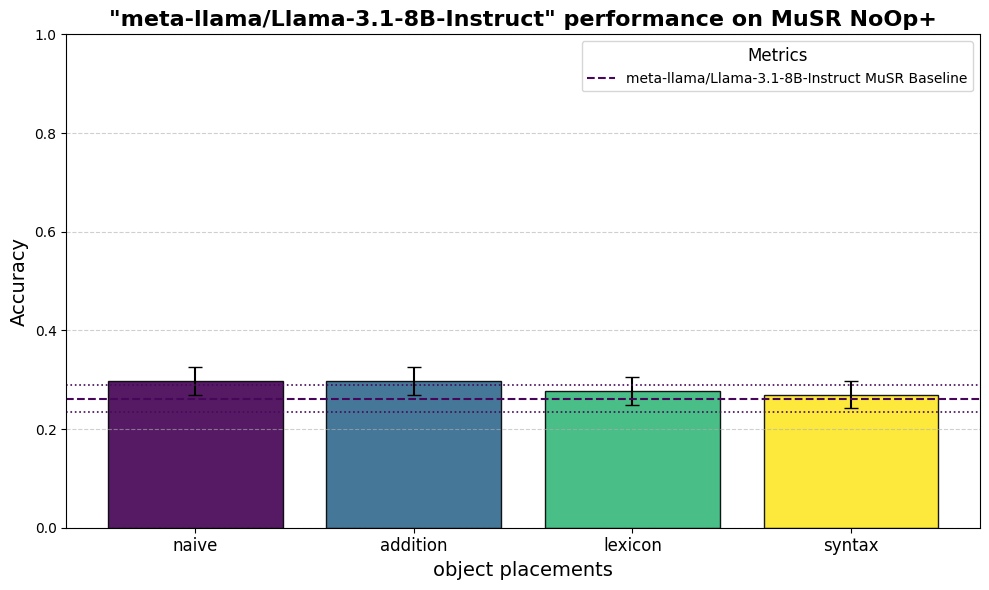

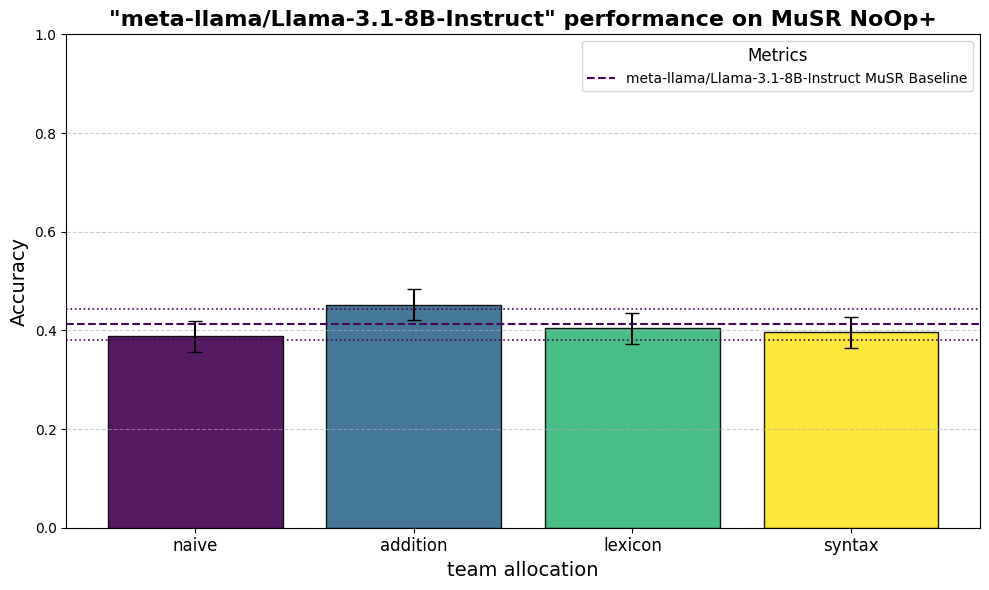

In [47]:
plot_results(0)
plot_results(1)
plot_results(2)